# 相关库导入

**导入相关库及自己写的logistic模型和DataSet类**

In [1]:
from logistic import Logistic
from utils.Data import DataClass, DataSet, DataSpliter
import numpy as np
from sklearn.datasets import load_iris
import logging
from matplotlib import pyplot as plt
logging.disable(logging.WARNING)    # 禁用 DataSet 定义的 Logging

# 西瓜数据集

- 基本数据

In [4]:
feature=[["青绿","蜷缩","浊响","清晰","凹陷","硬滑",0.697,0.46],
            ["乌黑","蜷缩","沉闷","清晰","凹陷","硬滑",0.774,0.376],
            ["乌黑","蜷缩","浊响","清晰","凹陷","硬滑",0.634,0.264],
            ["青绿","蜷缩","沉闷","清晰","凹陷","硬滑",0.608,0.318],
            ["浅白","蜷缩","浊响","清晰","凹陷","硬滑",0.556,0.215],
            ["青绿","稍蜷","浊响","清晰","稍凹","软粘",0.403,0.237],
            ["乌黑","稍蜷","浊响","稍糊","稍凹","软粘",0.481,0.149],
            ["乌黑","稍蜷","浊响","清晰","稍凹","硬滑",0.437,0.211],
            ["乌黑","稍蜷","沉闷","稍糊","稍凹","硬滑",0.666,0.091],
            ["青绿","硬挺","清脆","清晰","平坦","软粘",0.243,0.267],
            ["浅白","硬挺","清脆","模糊","平坦","硬滑",0.245,0.057],
            ["浅白","蜷缩","浊响","模糊","平坦","软粘",0.343,0.099],
            ["青绿","稍蜷","浊响","稍糊","凹陷","硬滑",0.639,0.161],
            ["浅白","稍蜷","沉闷","稍糊","凹陷","硬滑",0.657,0.198],
            ["乌黑","稍蜷","浊响","清晰","稍凹","软粘",0.36,0.37],
            ["浅白","蜷缩","浊响","模糊","平坦","硬滑",0.593,0.042],
            ["青绿","蜷缩","沉闷","稍糊","稍凹","硬滑",0.719,0.103]]
label=[1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]
feature_title=["色泽","根蒂","敲声","纹理","脐部","触感","密度","含糖率"]
ITER_NUM = 1000     # 迭代次数

- 数据预处理

In [5]:
feature = np.array(feature, dtype=object)
label = np.array(label, dtype=object)
dataset_watermelon = DataSet(feature,label,feature_title,labelConvert = False)    # 制作数据集
feature_watermelon, label_watermelon = dataset_watermelon.getFeatureAndLabel(is_converted = True)
title_watermelon = dataset_watermelon.getTitle(is_converted=True)

**模型训练及评估**

In [6]:
model_watermelon = Logistic(feature_watermelon, label_watermelon)       # Logistic模型构建
model_watermelon.optimize(lr = 0.3, iter_num = ITER_NUM, method="gd")   # Logistic模型训练
acc = model_watermelon.eval(feature_watermelon, label_watermelon)
print("西瓜数据集上的训练轮数为：{:d}，分类正确率为：{:.2%}".format(ITER_NUM, acc))

西瓜数据集上的训练轮数为：1000，分类正确率为：94.12%


**Loss曲线绘制**

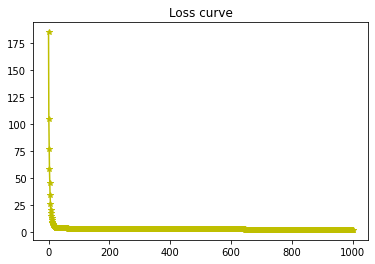

In [7]:
lst = model_watermelon.getLossRec()
plt.plot(lst,'-y*')
plt.title("Loss curve")
plt.show()

# 鸢尾花数据集

**数据读取**

In [8]:
ITER_NUM = 1000
dataset_iris = load_iris()
feature_iris = dataset_iris.data
label_iris = dataset_iris.target
labelName_iris = dataset_iris.target_names
title_iris = ["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm"]

**数据预处理**

In [9]:
dataset_iris = DataSet(feature_iris, label_iris, title_iris)
feature_iris, label_iris = dataset_iris.getFeatureAndLabel()
trainFeatureSet, trainLabelSet, testFeatureSet, testLabelSet = DataSpliter.trainAndTestSetSpliter_bareData(feature_iris, label_iris, is_shuffle = True, trainRatio = 0.7)
indexOfLabel0_1 = abs(trainLabelSet.reshape(len(trainLabelSet,)) - 0.5) < 0.5 + 1e-6            # 将对应类别的数据下标提取出来
indexOfLabel0_2 = abs(trainLabelSet.reshape(len(trainLabelSet,)) - 1) > 1 - 1e-6                
indexOfLabel1_2 = abs(trainLabelSet.reshape(len(trainLabelSet,)) - 1.5) < 0.5 + 1e-6            
trainLabelSet0_1 = trainLabelSet[indexOfLabel0_1]   # 根据类别筛选样本，对三个分类器筛选出三组数据
trainLabelSet0_2 = trainLabelSet[indexOfLabel0_2]
trainLabelSet1_2 = trainLabelSet[indexOfLabel1_2]
trainFeatureSet0_1 = trainFeatureSet[indexOfLabel0_1]
trainFeatureSet0_2 = trainFeatureSet[indexOfLabel0_2]
trainFeatureSet1_2 = trainFeatureSet[indexOfLabel1_2]
mapping_0 = {0:1, 1:0, 2:0} # 0 作为正例
mapping_1 = {0:0, 1:1, 2:0} # 1 作为正例
mapping_2 = {0:0, 1:0, 2:1} # 2 作为正例

def convertMapping(label, mapping):     # 标记正反例
    for idx, val in enumerate(label):
        val = int(val)
        label[idx] = mapping[val]
    return label

trainLabelSet0_1 = convertMapping(trainLabelSet0_1, mapping_1)  # 将 0 转成 0（反例），1 转成 1（正例）
trainLabelSet0_2 = convertMapping(trainLabelSet0_2, mapping_2)  # 将 0 转成 0（反例），2 转成 1（正例）
trainLabelSet1_2 = convertMapping(trainLabelSet1_2, mapping_2)  # 将 1 转成 0（反例），2 转成 1（正例）

**模型构建及训练**

In [14]:
# OvO多分类策略 构建三组Logistic分类器
model_iris_0_1 = Logistic(trainFeatureSet0_1, trainLabelSet0_1)
model_iris_0_2 = Logistic(trainFeatureSet0_2, trainLabelSet0_2)
model_iris_1_2 = Logistic(trainFeatureSet1_2, trainLabelSet1_2)
# 模型训练
OvR_LR = 0.05       # 学习率
model_iris_0_1.optimize(iter_num = ITER_NUM, lr = OvR_LR, method = "gd")
model_iris_0_2.optimize(iter_num = ITER_NUM, lr = OvR_LR, method = "gd")
model_iris_1_2.optimize(iter_num = ITER_NUM, lr = OvR_LR, method = "gd")
# 获取训练集准确率
acc_0 = model_iris_0_1.eval(trainFeatureSet, trainLabelSet0_1)
acc_1 = model_iris_0_2.eval(trainFeatureSet, trainLabelSet0_2)
acc_2 = model_iris_1_2.eval(trainFeatureSet, trainLabelSet1_2)
acc_search = [(acc_0, 0), (acc_1, 1), (acc_2, 2)]
acc_search.sort(key = lambda x: x[0], reverse = True)   # 按照准确率从大到小排列，后续扫描从准确率大的开始比对
# 开始进行预测
acc = 0
tot = len(testLabelSet)
modelLst = [model_iris_0_1, model_iris_0_2, model_iris_1_2]
for X, y in zip(testFeatureSet, testLabelSet):
    y = int(y)
    pred = [md.pred(X) for md in modelLst]
    pred[0] = 0 if pred[0] == 0 else 1
    pred[1] = 0 if pred[1] == 0 else 2
    pred[2] = 1 if pred[2] == 0 else 2
    rec = [0, 0, 0]
    for i in pred:
        rec[i] += 1
    if np.argmax(rec) == y:
        acc += 1
print("鸢尾花数据集上的训练轮数为：{:d}，训练集上的分类正确率为：{:.2%}".format(ITER_NUM, acc / tot))

鸢尾花数据集上的训练轮数为：1000，训练集上的分类正确率为：95.56%


**Loss curve绘制**

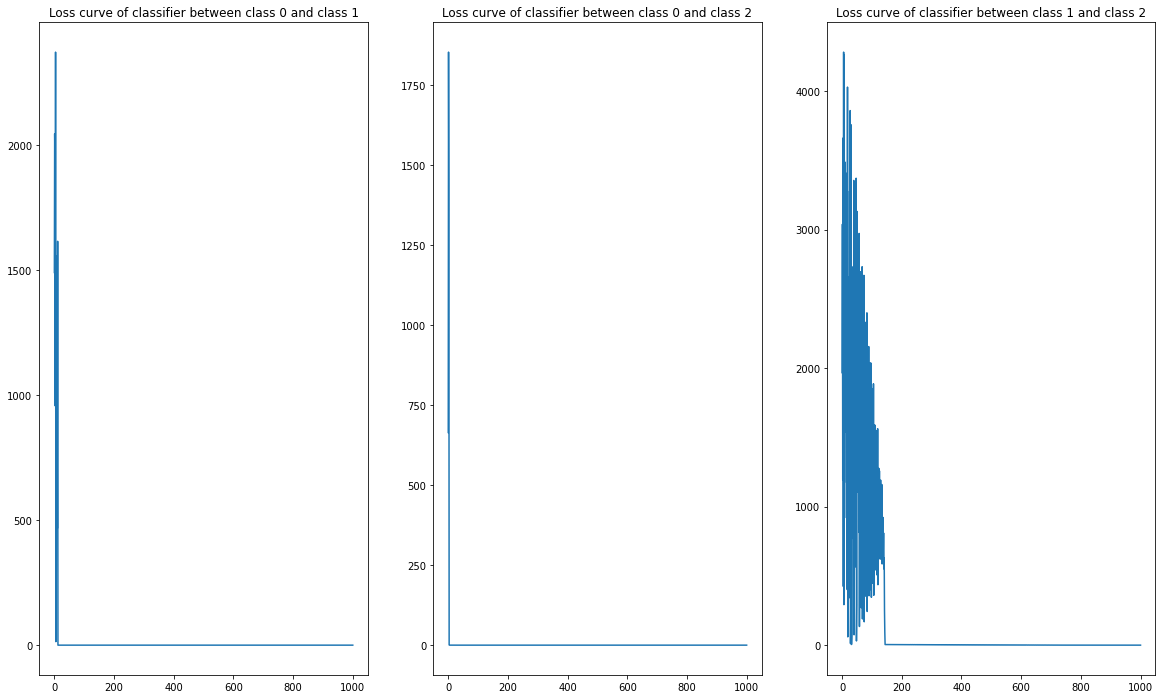

In [16]:
loss_0 = model_iris_0_1.getLossRec()
loss_1 = model_iris_0_2.getLossRec()
loss_2 = model_iris_1_2.getLossRec()
plt.subplot(1,3,1)
plt.plot(loss_0)
plt.title("Loss curve of classifier between class 0 and class 1")
plt.subplot(1,3,2)
plt.plot(loss_1)
plt.title("Loss curve of classifier between class 0 and class 2")
plt.subplot(1,3,3)
plt.plot(loss_2)
plt.title("Loss curve of classifier between class 1 and class 2")
plt.rcParams['figure.figsize'] = (20.0, 12.0)
plt.show()